In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("AppStoreAssessmentDataScience.csv")
df = pd.DataFrame(dataset)
print(df.shape)
df.info()
df.describe()
#df.mean()

(7197, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 9 columns):
Unnamed: 0                   7197 non-null int64
id                           7197 non-null int64
app_size_bytes               7197 non-null int64
app_price                    7197 non-null float64
app_rating_count             7197 non-null int64
app_rating                   7197 non-null float64
app_content_rating           7197 non-null object
app_genre                    7197 non-null object
app_total_supported_langs    7197 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 506.1+ KB


,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_total_supported_langs
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,5.434903
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,7.919593
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,8.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,75.000000


In [5]:
# app_genre_df = df[df.columns[[1,7]]]
# app_genre_df.drop_duplicates("app_genre")
# app_content_df = df[df.columns[[6]]]
# app_content_df.drop_duplicates()

In [6]:
df.groupby('app_content_rating').app_content_rating.count()

app_content_rating
12+    1155
17+     622
4+     4433
9+      987
Name: app_content_rating, dtype: int64

In [7]:
df.groupby('app_genre').app_genre.count().sort_values(ascending=False)

app_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: app_genre, dtype: int64

In [54]:
free_df = df[(df['app_price'] == 0)]
full_paid_df = df[(df['app_price'] > 0)]
paid_df = df[(df['app_price'] > 0) & (df['app_price'] < 5)]
paid_df.describe()

,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_total_supported_langs
count,2703.000000,2.703000e+03,2.703000e+03,2703.000000,2703.000000,2703.000000,2703.000000
mean,4184.574177,8.116113e+08,1.923243e+08,2.615601,4151.972623,3.723270,5.046985
std,3044.924994,2.806356e+08,3.394797e+08,1.361291,25764.724060,1.299662,7.302673
min,1.000000,2.816565e+08,5.898240e+05,0.990000,0.000000,0.000000,0.000000
25%,1640.500000,5.412214e+08,3.379096e+07,0.990000,28.000000,3.500000,1.000000
50%,3546.000000,9.161301e+08,8.337818e+07,2.990000,206.000000,4.000000,1.000000
75%,6326.500000,1.064090e+09,1.893176e+08,2.990000,1398.000000,4.500000,7.000000
max,11087.000000,1.187780e+09,3.856589e+09,4.990000,698516.000000,5.000000,58.000000


app_price
0.99    3.464286
1.99    3.737520
2.99    3.891654
3.99    3.796029
4.99    3.836294
Name: app_rating, dtype: float64


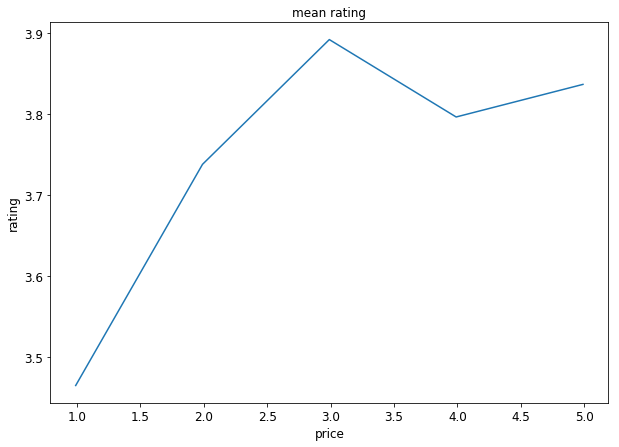

In [65]:
a = paid_df.groupby(['app_price'])['app_rating'].mean()
print(a)
ax = a.plot(kind='line', title ="mean rating",figsize=(10, 7), legend=False, fontsize=12)
ax.set_xlabel("price", fontsize=12)
ax.set_ylabel("rating", fontsize=12)
plt.show()

In [58]:
price_count = paid_df.groupby(['app_price','app_rating']).size().reset_index()
price_count.rename(columns={price_count.columns[2]: "count"}, inplace=True)
price_rate = price_count.groupby(['app_price','app_rating']).agg({'count': 'sum'})
count_pcts = price_rate.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(count_pcts)
#count_pcts.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8), title="abc")

                          count
app_price app_rating           
0.99      0.0         13.324176
          1.0          0.961538
          1.5          1.236264
          2.0          2.197802
          2.5          2.884615
          3.0          7.005495
          3.5          8.379121
          4.0         21.016484
          4.5         34.752747
          5.0          8.241758
1.99      0.0          5.475040
          1.0          1.127214
          1.5          1.610306
          2.0          2.576490
          2.5          4.186795
          3.0          5.475040
          3.5         12.077295
          4.0         24.315620
          4.5         34.299517
          5.0          8.856683
2.99      0.0          4.831625
          1.0          0.292826
          1.5          1.024890
          2.0          0.732064
          2.5          2.049780
          3.0          5.270864
          3.5         10.980966
          4.0         26.500732
          4.5         42.166911
        

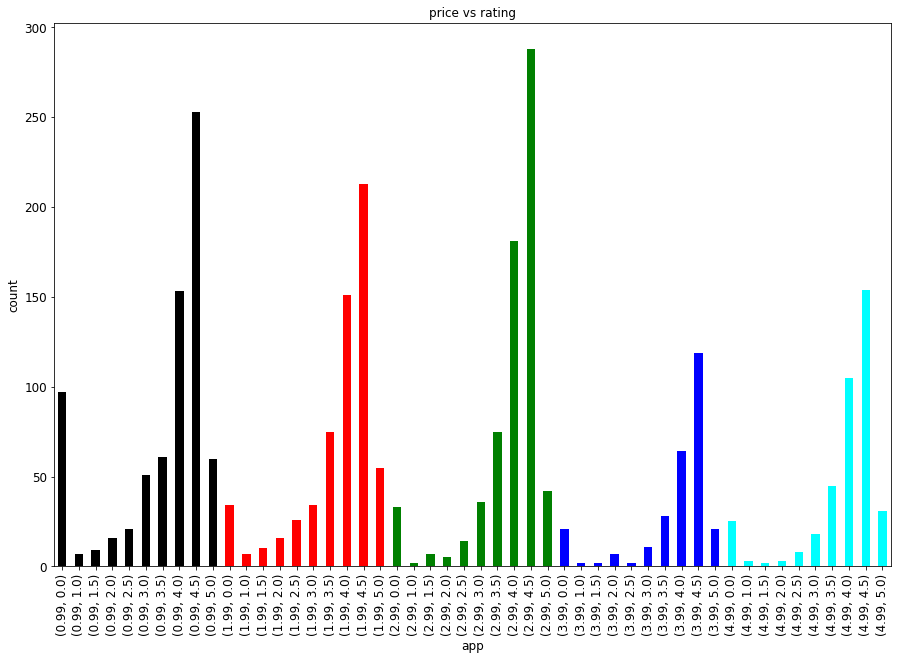

In [60]:
temp = paid_df.groupby(['app_price','app_rating']).size()
ax = temp.plot(kind='bar', title ="price vs rating", figsize=(15, 10), fontsize=12, color=['black']*10+['red']*10+['green']*10+['blue']*10+['cyan']*10)
ax.set_xlabel("app", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.show()

In [62]:
zero_rate = paid_df[(paid_df['app_rating'] == 0)]
zero_rate.describe()

,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_total_supported_langs
count,210.000000,2.100000e+02,2.100000e+02,210.000000,210.0,210.0,210.000000
mean,5775.823810,9.445335e+08,1.499579e+08,2.242381,0.0,0.0,2.400000
std,3180.441672,2.331565e+08,2.066673e+08,1.427052,0.0,0.0,4.436905
min,227.000000,3.291741e+08,8.806400e+05,0.990000,0.0,0.0,0.000000
25%,3106.500000,8.649617e+08,2.688154e+07,0.990000,0.0,0.0,1.000000
50%,5498.000000,1.039401e+09,7.534643e+07,1.990000,0.0,0.0,1.000000
75%,8522.500000,1.111286e+09,1.868913e+08,2.990000,0.0,0.0,2.000000
max,11074.000000,1.187128e+09,1.174128e+09,4.990000,0.0,0.0,31.000000


In [64]:
free_df.describe()

,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_total_supported_langs
count,4056.000000,4.056000e+03,4.056000e+03,4056.0,4.056000e+03,4056.000000,4056.000000
mean,5161.857495,8.991647e+08,1.479357e+08,0.0,1.974980e+04,3.376726,5.732495
std,3073.181123,2.583709e+08,2.089014e+08,0.0,9.774428e+04,1.644807,8.505148
min,2.000000,2.817961e+08,7.671260e+05,0.0,0.000000e+00,0.000000,0.000000
25%,2546.250000,7.008908e+08,5.404134e+07,0.0,2.200000e+01,3.000000,1.000000
50%,4950.000000,1.014135e+09,9.960038e+07,0.0,4.660000e+02,4.000000,1.000000
75%,7632.500000,1.091131e+09,1.611986e+08,0.0,5.450750e+03,4.500000,9.000000
max,11097.000000,1.188376e+09,3.148421e+09,0.0,2.974676e+06,5.000000,75.000000


app_rating
0.0        0.000000
1.0       29.568182
1.5      203.500000
2.0     2907.235849
2.5     5419.933673
3.0     7487.130548
3.5    15503.266382
4.0     7836.835793
4.5    22029.743522
5.0    12699.829268
Name: app_rating_count, dtype: float64


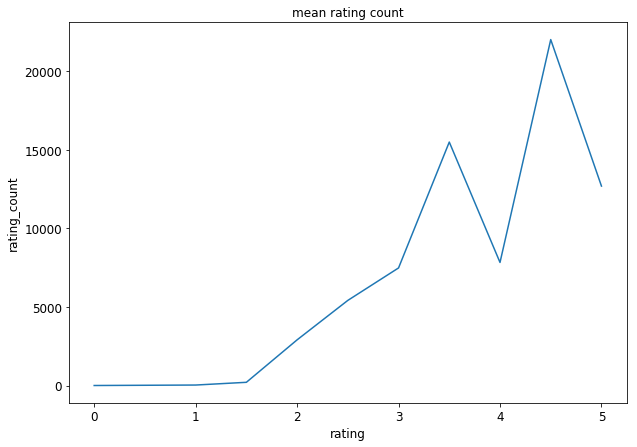

In [69]:
b = df.groupby(['app_rating'])['app_rating_count'].mean()
print(b)
bx = b.plot(kind='line', title ="mean rating count",figsize=(10, 7), legend=False, fontsize=12)
bx.set_xlabel("rating", fontsize=12)
bx.set_ylabel("rating_count", fontsize=12)
plt.show()

app_content_rating
9+     3.570156
4+     3.769504
12+    3.566667
17+    2.760450
Name: app_rating, dtype: float64


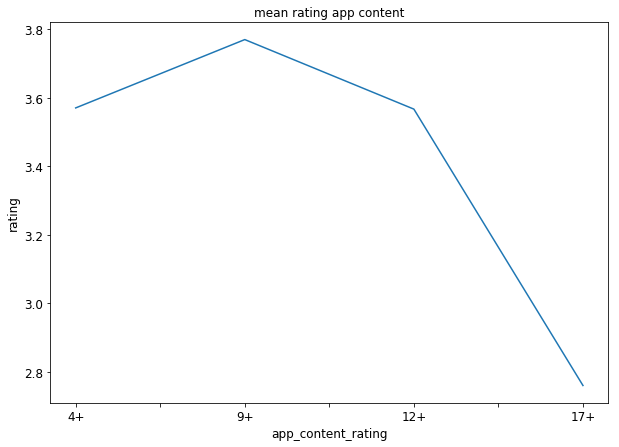

In [103]:
c = df.groupby(['app_content_rating'])['app_rating'].mean().sort_values(ascending=False)
x, y = c.iloc[0].copy(), c.iloc[1].copy()
c.iloc[0],c.iloc[1] = y,x
print(c)
cx = c.plot(kind='line', title ="mean rating app content",figsize=(10, 7), legend=False, fontsize=12)
cx.set_xlabel("app_content_rating", fontsize=12)
cx.set_ylabel("rating", fontsize=12)
cx.set_xticklabels(['','4+','','9+','','12+','','17+'])
plt.show()

            app_genre  app_rating
0        Productivity    4.005618
1               Music    3.978261
2       Photo & Video    3.800860
3            Business    3.745614
4    Health & Fitness    3.700000
5               Games    3.685008
6             Weather    3.597222
7            Shopping    3.540984
8           Reference    3.453125
9              Travel    3.376543
10          Education    3.376380
11            Medical    3.369565
12          Utilities    3.278226
13      Entertainment    3.246729
14       Food & Drink    3.182540
15  Social Networking    2.985030
16             Sports    2.982456
17               News    2.980000
18          Lifestyle    2.805556
19         Navigation    2.684783
20               Book    2.477679
21            Finance    2.432692
22           Catalogs    2.100000


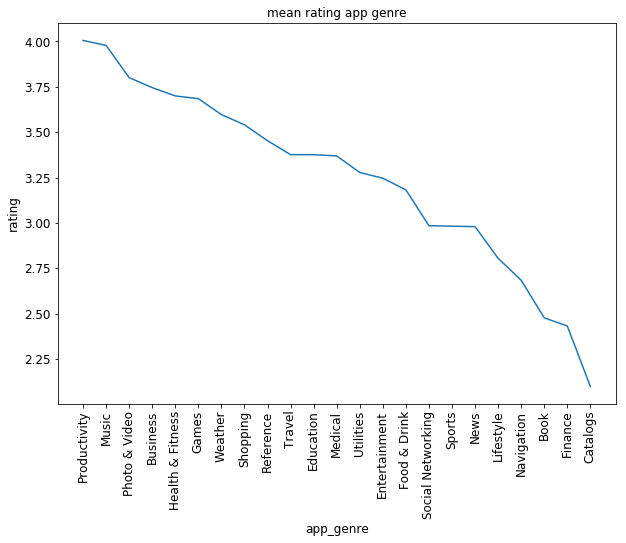

In [116]:
d = df.groupby(['app_genre'])['app_rating'].mean().sort_values(ascending=False).reset_index()
print(d)
genre_list = ['Productivity','Music','Photo & Video','Business','Health & Fitness','Games','Weather','Shopping','Reference','Travel','Education','Medical','Utilities','Entertainment','Food & Drink','Social Networking','Sports','News','Lifestyle','Navigation','Book','Finance','Catalogs']
dx = d.plot(x='app_genre',y='app_rating',xticks=d.index,kind='line', title ="mean rating app genre",figsize=(10, 7), legend=False, fontsize=12,x_compat=True)
dx.set_xlabel("app_genre", fontsize=12)
dx.set_ylabel("rating", fontsize=12)
dx.set_xticklabels(genre_list,rotation = 90)
plt.show()

   app_rating  app_total_supported_langs
0         0.0                   2.362756
1         1.0                   2.727273
2         1.5                   2.232143
3         2.0                   2.915094
4         2.5                   4.545918
5         3.0                   4.057441
6         3.5                   5.777778
7         4.0                   5.911439
8         4.5                   6.741645
9         5.0                   4.674797


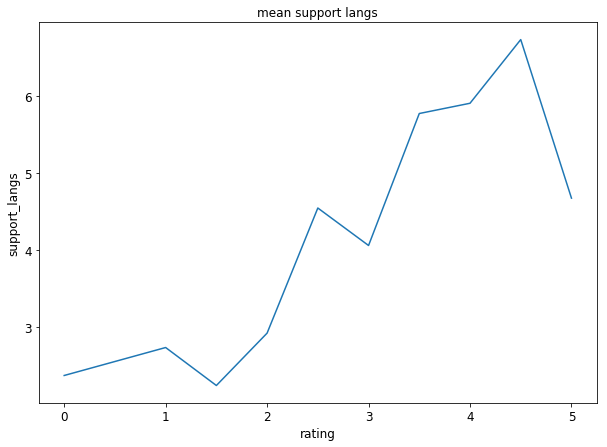

In [121]:
e = df.groupby(['app_rating'])['app_total_supported_langs'].mean().reset_index()
print(e)
ex = e.plot(x='app_rating',y='app_total_supported_langs',kind='line', title ="mean support langs",figsize=(10, 7), legend=False, fontsize=12,x_compat=True)
ex.set_xlabel("rating", fontsize=12)
ex.set_ylabel("support_langs", fontsize=12)
plt.show()

   app_rating  app_size_bytes
0         0.0    1.545463e+08
1         1.0    6.311240e+07
2         1.5    6.397966e+07
3         2.0    8.878507e+07
4         2.5    1.238298e+08
5         3.0    1.694169e+08
6         3.5    2.044705e+08
7         4.0    2.383879e+08
8         4.5    2.163224e+08
9         5.0    1.574089e+08


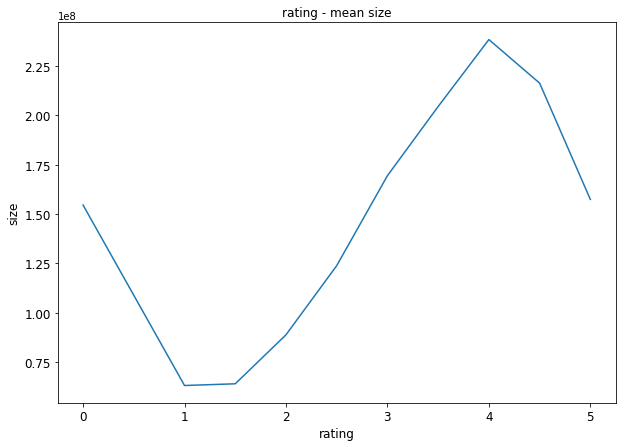

In [127]:
f = df.groupby(['app_rating'])['app_size_bytes'].mean().reset_index()
print(f)
fx = f.plot(x='app_rating',y='app_size_bytes',kind='line', title ="rating - mean size",figsize=(10, 7), legend=False, fontsize=12,x_compat=True)
fx.set_xlabel("rating", fontsize=12)
fx.set_ylabel("size", fontsize=12)
plt.show()